<a href="https://colab.research.google.com/github/DavProg49/Notebook/blob/main/Carte_Voeux.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Creation de carte de voeux personnalisé**

Une carte de voeux différente pour chaque semaine. 
Pour savoir combien en créer, on se base sur les données de naissance aux Etats-Unis

1 - livraison d'un graphique qui représente le nombre de naissance pour chaque jour de la semaine pour les décenniers 1960, 1970, 1980

2 - Nettoyage des données, algèbre linéaire. Traitement en utilisant la fonction to_datetime.
*   Nettoyage de la colonne births.
*   Conversion des colonnes day, month et year en datatime.
*   Conversion en jour de semaine.
*   L'agrégation doit être faite grâce à librairies Pandas.



In [180]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from urllib import request

request.urlretrieve ("https://raw.githubusercontent.com/jakevdp/data-CDCbirths/master/births.csv","births.csv")
df = pd.read_csv('births.csv',parse_dates=[['year','month','day']])
df.columns =['Date','Genre','Naissance']
df

,Date,Genre,Naissance
0,1969 1 1,F,4046
1,1969 1 1,M,4440
2,1969 1 2,F,4454
3,1969 1 2,M,4548
4,1969 1 3,F,4548
...,...,...,...
15542,2008 10 nan,M,183219
15543,2008 11 nan,F,158939
15544,2008 11 nan,M,165468
15545,2008 12 nan,F,173215


In [181]:
#analyse des types de colonnes :
print(df.dtypes)

Date         object
Genre        object
Naissance     int64
dtype: object


In [182]:
df["Date"] = pd.to_datetime(df["Date"],errors='coerce')
df_clean = df.dropna()
df_clean

,Date,Genre,Naissance
0,1969-01-01,F,4046
1,1969-01-01,M,4440
2,1969-01-02,F,4454
3,1969-01-02,M,4548
4,1969-01-03,F,4548
...,...,...,...
15062,1988-12-29,M,5944
15063,1988-12-30,F,5742
15064,1988-12-30,M,6095
15065,1988-12-31,F,4435


In [195]:
df_clean.loc[:,'Jour'] = df_clean.loc[:,'Date'].dt.weekday
df_clean

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


,Date,Genre,Naissance,Jour,Decade
0,1969-01-01,F,4046,2,1960
1,1969-01-01,M,4440,2,1960
2,1969-01-02,F,4454,3,1960
3,1969-01-02,M,4548,3,1960
4,1969-01-03,F,4548,4,1960
...,...,...,...,...,...
15062,1988-12-29,M,5944,3,1980
15063,1988-12-30,F,5742,4,1980
15064,1988-12-30,M,6095,4,1980
15065,1988-12-31,F,4435,5,1980


In [196]:
 # on a une table avec seulement les gens nées dans les années 60
df_clean["Decade"] = ((df_clean['Date'].dt.year/10).astype(float).astype(int))*10
df_clean

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Date,Genre,Naissance,Jour,Decade
0,1969-01-01,F,4046,2,1960
1,1969-01-01,M,4440,2,1960
2,1969-01-02,F,4454,3,1960
3,1969-01-02,M,4548,3,1960
4,1969-01-03,F,4548,4,1960
...,...,...,...,...,...
15062,1988-12-29,M,5944,3,1980
15063,1988-12-30,F,5742,4,1980
15064,1988-12-30,M,6095,4,1980
15065,1988-12-31,F,4435,5,1980


<Figure size 792x576 with 0 Axes>

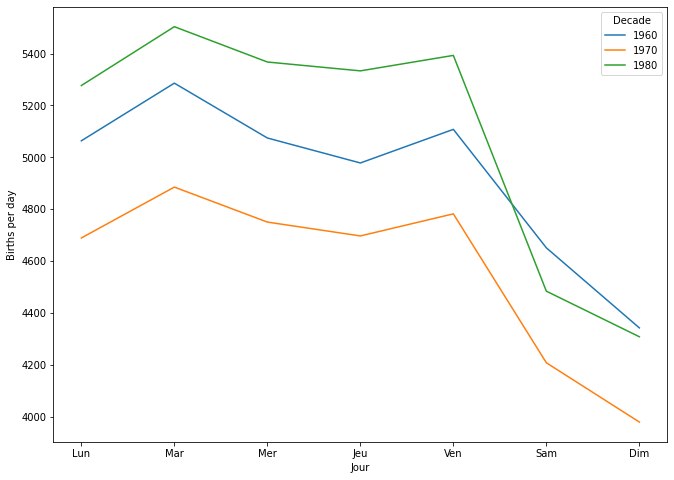

In [197]:
# affichage des données, on vient calculer la moyenne des naissances par jour pour chaque décade
fig=plt.figure(figsize=(11,8))
births_per_day=df_clean.pivot_table('Naissance', index='Jour',columns='Decade', aggfunc='mean')
births_per_day.plot(figsize=(11,8))
plt.gca().set_xticklabels(['','Lun','Mar','Mer','Jeu','Ven','Sam','Dim'])
plt.ylabel('Births per day');

In [194]:
births_per_day

Decade,1960,1970,1980
Jour,,,
1,5063.826923,4689.097701,5276.907249
2,5286.096154,4885.252399,5503.842553
3,5074.622642,4750.376200,5367.642553
4,4978.288462,4696.923372,5333.485106
5,5107.884615,4782.095785,5393.087234
6,4651.057692,4207.784483,4483.901064
7,4342.346154,3979.278736,4308.120469
